# Capstone
## To Do List
1. EDA
# Import Datasets

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_cleaned_reddit_data = pd.read_csv("C:/Users/annaj/Desktop/Python/Capstone/df_cleaned_reddit_data_bert_embeddings.csv")
df_pl_master = pd.read_csv("C:/Users/annaj/Desktop/Python/Capstone/df_pl_master_bert_embeddings.csv")
df_toxicity_cleaned = pd.read_csv("C:/Users/annaj/Desktop/Python/Capstone/toxicity_w_bert_and_correct_labels.csv")

In [6]:
df_cleaned_reddit_data.head(2)

,index,content_type,subreddit,post_id,title,body_text,score,author,created_utc,comment_id,...,sadness,negative,trust,anticipation.1,left_vocab_count,right_vocab_count,sentiment_difference,entity_sentiments,Text Length,bert_embedding
0,0,comment,politics,1i5fbrq,was the whole tiktok drama a bait-and-switch t...,NaN,2728.0,iiConTr0v3rSYx,2025-01-20 2:06,m83cp9t,...,0.0,0.0,0.25,0.0,0,0,0.45,"[('the white house', 0.0), ('yesterday', 0.0),...",159,"[-0.3654874861240387, 0.30081263184547424, -0...."
1,1,comment,politics,1i5fbrq,was the whole tiktok drama a bait-and-switch t...,NaN,734.0,letsbuildasnowman,2025-01-20 2:04,m83cbn1,...,0.0,0.0,0.00,0.0,0,0,0.10,"[('the next four years', 0.0)]",170,"[-0.3260619342327118, 0.3003571927547455, 0.13..."


In [8]:
df_pl_master.head(2)

,index,Text,political_leaning,sentiment_score,toxic_word_count,emotions,anger,disgust,anticipation,fear,...,joy,sadness,negative,trust,anticipation.1,left_vocab_count,right_vocab_count,entity_sentiments,Text Length,bert_embedding
0,0,nba players refused to take the court last yea...,right,0.30,0,"[('anger', 0.23529411764705882)]",0.235294,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,"[('nba players', -0.9325), ('last year', -0.93...",270,"[-0.09218521416187286, 0.2759753167629242, 0.0..."
1,1,weird because my monoclonal antibody treatment...,right,-0.05,0,"[('negative', 0.5), ('disgust', 0.5)]",0.000000,0.5,0.0,0.0,...,0.0,0.0,0.5,0.0,0.0,0,0,[],56,"[-0.38054177165031433, 0.18270647525787354, 0...."


In [10]:
df_toxicity_cleaned.head(2)

,Unnamed: 0,index,unique_id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,...,positive,joy,sadness,negative,trust,anticipation.1,left_vocab_count,right_vocab_count,Text Length,bert_embedding
0,0,0,00001cee341fdb12,yo bitch ja rule is more succesful then you wi...,1,0,1,0,1,0,...,0.0,0.0,0.0,0.159091,0.0,0,0,0,365,"[-0.38544198870658875, 0.3357332646846771, -0...."
1,1,1,0000247867823ef7,"from rfc the title is fine as it is, imo.",0,0,0,0,0,0,...,0.5,0.0,0.0,0.000000,0.5,0,0,0,46,"[-0.30363142490386963, 0.061914704740047455, -..."


# Checking Missing Values

In [13]:
# Check for missing values in each DataFrame
def check_missing_values(df, df_name):
    print(f"Missing values in {df_name}:")
    missing_values = df.isnull().sum()
    print(missing_values)
    print("----------------------------")

# Check missing values for each DataFrame
check_missing_values(df_cleaned_reddit_data, "df_cleaned_reddit_data")
check_missing_values(df_pl_master, "df_pl_master")
check_missing_values(df_toxicity_cleaned, "df_toxicity_cleaned")


Missing values in df_cleaned_reddit_data:
index                        0
content_type                 0
subreddit                    0
post_id                      0
title                      229
body_text               165421
score                        0
author                       0
created_utc                  0
comment_id                   0
comment_body                 0
parent_id                    0
sentiment_score              0
hashed_author_id             0
toxic_word_count         15976
emotions                     0
anger                        0
disgust                      0
anticipation                 0
surprise                     0
fear                         0
positive                     0
joy                          0
sadness                      0
negative                     0
trust                        0
anticipation.1               0
left_vocab_count             0
right_vocab_count            0
sentiment_difference       229
entity_sentiments           

# Drop columns with high missing Values

In [16]:
df_cleaned_reddit_data.drop(['body_text','toxic_word_count'], axis=1, inplace=True)
df_pl_master.drop('anticipation.1', axis=1, inplace=True)

# Delete rows for the columns which have low missing values

In [19]:
df_cleaned_reddit_data.dropna(inplace=True)
df_pl_master.dropna(inplace=True)
df_toxicity_cleaned.dropna(inplace=True)

# Print Name of Columns

In [22]:
print(f"Columns in df_cleaned_reddit_data:")
print(df_cleaned_reddit_data.columns.tolist())
print("----------------------------")
print(f"Columns in df_pl_master:")
print(df_pl_master.columns.tolist())
print("----------------------------")
print(f"Columns in df_toxicity_cleaned:")
print(df_toxicity_cleaned.columns.tolist())
print("----------------------------")


Columns in df_cleaned_reddit_data:
['index', 'content_type', 'subreddit', 'post_id', 'title', 'score', 'author', 'created_utc', 'comment_id', 'comment_body', 'parent_id', 'sentiment_score', 'hashed_author_id', 'emotions', 'anger', 'disgust', 'anticipation', 'surprise', 'fear', 'positive', 'joy', 'sadness', 'negative', 'trust', 'anticipation.1', 'left_vocab_count', 'right_vocab_count', 'sentiment_difference', 'entity_sentiments', 'Text Length', 'bert_embedding']
----------------------------
Columns in df_pl_master:
['index', 'Text', 'political_leaning', 'sentiment_score', 'toxic_word_count', 'emotions', 'anger', 'disgust', 'anticipation', 'fear', 'surprise', 'positive', 'joy', 'sadness', 'negative', 'trust', 'left_vocab_count', 'right_vocab_count', 'entity_sentiments', 'Text Length', 'bert_embedding']
----------------------------
Columns in df_toxicity_cleaned:
['Unnamed: 0', 'index', 'unique_id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', '

# Standardization of column names

## Step 1: Create a Standard Naming Scheme
##### Decide on the column names you'd like to standardize across all DataFrames. For example:

In [26]:
# Common column names mapping
standard_column_mapping = {
    'Unnamed: 0': 'index',
    'type': 'content_type',
    'subreddit': 'subreddit',
    'post_id': 'post_id',
    'title': 'title',
    'body': 'body_text',
    'score': 'score',
    'author': 'author',
    'created_utc': 'created_utc',
    'comment_id': 'comment_id',
    'comment_body': 'comment_body',
    'comment_text': 'comment_text',
    'parent_id': 'parent_id',
    'sentiment': 'sentiment_score',
    'hashed_author_id': 'hashed_author_id',
    'toxic_word_count': 'toxic_word_count',
    'emotions': 'emotions',
    'anger': 'anger',
    'disgust': 'disgust',
    'anticipation': 'anticipation',
    'surprise': 'surprise',
    'fear': 'fear',
    'positive': 'positive',
    'joy': 'joy',
    'sadness': 'sadness',
    'negative': 'negative',
    'trust': 'trust',
    'anticip': 'anticipation',
    'left_vocab_count': 'left_vocab_count',
    'right_vocab_count': 'right_vocab_count',
    'sentiment_difference': 'sentiment_difference',
    'entity_sentiments': 'entity_sentiments',
    'id': 'unique_id',
    'toxic': 'toxic',
    'severe_toxic': 'severe_toxic',
    'obscene': 'obscene',
    'threat': 'threat',
    'insult': 'insult',
    'identity_hate': 'identity_hate',
    'Text': 'Text',
    'Political_Leanings': 'political_leaning'
}


## Step 2: Apply Renaming to Each DataFrame
##### You can use the rename method and pass this mapping to each DataFrame:

In [29]:
# Rename columns in all DataFrames
df_cleaned_reddit_data.rename(columns=standard_column_mapping, inplace=True)
df_pl_master.rename(columns=standard_column_mapping, inplace=True)
df_toxicity_cleaned.rename(columns=standard_column_mapping, inplace=True)


# Print the column names of all three DataFrames again to verify:
print("Columns in df_cleaned_reddit_data (after renaming):")
print(df_cleaned_reddit_data.columns.tolist())
print("----------------------------")
print("Columns in df_pl_master (after renaming):")
print(df_pl_master.columns.tolist())
print("----------------------------")
print("Columns in df_toxicity_cleaned (after renaming):")
print(df_toxicity_cleaned.columns.tolist())


Columns in df_cleaned_reddit_data (after renaming):
['index', 'content_type', 'subreddit', 'post_id', 'title', 'score', 'author', 'created_utc', 'comment_id', 'comment_body', 'parent_id', 'sentiment_score', 'hashed_author_id', 'emotions', 'anger', 'disgust', 'anticipation', 'surprise', 'fear', 'positive', 'joy', 'sadness', 'negative', 'trust', 'anticipation.1', 'left_vocab_count', 'right_vocab_count', 'sentiment_difference', 'entity_sentiments', 'Text Length', 'bert_embedding']
----------------------------
Columns in df_pl_master (after renaming):
['index', 'Text', 'political_leaning', 'sentiment_score', 'toxic_word_count', 'emotions', 'anger', 'disgust', 'anticipation', 'fear', 'surprise', 'positive', 'joy', 'sadness', 'negative', 'trust', 'left_vocab_count', 'right_vocab_count', 'entity_sentiments', 'Text Length', 'bert_embedding']
----------------------------
Columns in df_toxicity_cleaned (after renaming):
['index', 'index', 'unique_id', 'comment_text', 'toxic', 'severe_toxic', 'ob

# Adding New Feature (Column) named "Text Length" to each dataframe.

In [32]:
# Add "Text Length" column for df_cleaned_reddit_data
df_cleaned_reddit_data['Text Length'] = df_cleaned_reddit_data['comment_body'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

# Add "Text Length" column for df_pl_master
df_pl_master['Text Length'] = df_pl_master['Text'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

# Add "Text Length" column for df_toxicity_cleaned
df_toxicity_cleaned['Text Length'] = df_toxicity_cleaned['comment_text'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

# Verify the new column
print("First 5 rows of df_cleaned_reddit_data with 'Text Length':")
print(df_cleaned_reddit_data[['comment_body', 'Text Length']].head())

print("\nFirst 5 rows of df_pl_master with 'Text Length':")
print(df_pl_master[['Text', 'Text Length']].head())

print("\nFirst 5 rows of df_toxicity_cleaned with 'Text Length':")
print(df_toxicity_cleaned[['comment_text', 'Text Length']].head())


First 5 rows of df_cleaned_reddit_data with 'Text Length':
                                        comment_body  Text Length
0  the white house said this yesterday.  the next...          159
1  for the next four years, everything he does mu...          170
2  yeah. maybe the media should point out hes the...           93
3  i wouldnt call it a bait-and-switch  just plai...          282
4                                                yup            3

First 5 rows of df_pl_master with 'Text Length':
                                                Text  Text Length
0  nba players refused to take the court last yea...          270
1  weird because my monoclonal antibody treatment...           56
2                     have you looked in the mirror?           30
3             christopher columbus did nothing wrong           38
4                                 let us go brandon!           18

First 5 rows of df_toxicity_cleaned with 'Text Length':
                                        co

# Normalization of Labels in "Political_Leanings" column in df_pl_master dataframe

In [35]:
# Function to normalize political leanings
def normalize_political_leanings(leaning):
    if pd.isna(leaning):
        return None
    leaning = leaning.strip().lower()
    if leaning in ["right", "conservative", "republican"]:
        return "right"
    elif leaning in ["left", "liberal", "democrat", "progressive"]:
        return "left"
    elif leaning in ["center", "centrist", "moderate"]:
        return "center"
    else:
        return "unknown"

df_pl_master["political_leaning"] = df_pl_master["political_leaning"].apply(normalize_political_leanings)

# EDA

# Statistical summaries

In [38]:
# Quick statistical summaries
print("Summary of Reddit Data:")
display(df_cleaned_reddit_data.describe())


Summary of Reddit Data:


,index,score,sentiment_score,anger,disgust,anticipation,surprise,fear,positive,joy,sadness,negative,trust,anticipation.1,left_vocab_count,right_vocab_count,sentiment_difference,Text Length
count,165192.000000,165192.000000,165192.000000,165192.000000,165192.000000,165192.000000,165192.000000,165192.000000,165192.000000,165192.000000,165192.000000,165192.000000,165192.000000,165192.0,165192.000000,165192.000000,165192.000000,165192.000000
mean,82697.849872,14.059083,0.055001,0.024839,0.015943,0.043268,0.028511,0.034571,0.152344,0.017962,0.023644,0.119459,0.064387,0.0,0.104248,0.141030,0.250901,233.763330
std,47779.004373,91.349322,0.250110,0.082506,0.066773,0.142889,0.122347,0.104723,0.231230,0.067602,0.082563,0.195446,0.157219,0.0,0.365648,0.452323,0.247461,361.115583
min,0.000000,-735.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
25%,41297.750000,1.000000,-0.015873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.055556,59.000000
50%,82649.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.180000,124.000000
75%,124115.250000,8.000000,0.171122,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.222222,0.000000,0.0,0.000000,0.000000,0.383333,264.000000
max,165420.000000,11513.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,7.000000,8.000000,2.000000,8914.000000


In [40]:
print("\nSummary of Political Leaning Data:")
display(df_pl_master.describe())



Summary of Political Leaning Data:


,index,sentiment_score,toxic_word_count,anger,disgust,anticipation,fear,surprise,positive,joy,sadness,negative,trust,left_vocab_count,right_vocab_count,Text Length
count,373273.000000,373273.000000,373273.000000,373273.000000,373273.000000,373273.000000,373273.000000,373273.000000,373273.000000,373273.000000,373273.000000,373273.000000,373273.000000,373273.000000,373273.000000,373273.000000
mean,100868.932524,0.098381,0.073962,0.015041,0.006569,0.030671,0.024651,0.183317,0.201857,0.010298,0.013424,0.068495,0.078562,0.039949,0.091933,160.489130
std,65223.122132,0.243035,0.296919,0.057709,0.038323,0.101868,0.078602,0.313984,0.234370,0.050303,0.056585,0.131398,0.149994,0.205975,0.332587,86.647295
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,46665.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000
50%,93327.000000,0.014815,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,158.000000
75%,146391.000000,0.213939,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.333333,0.000000,0.000000,0.125000,0.136364,0.000000,0.000000,226.000000
max,239709.000000,1.000000,11.000000,1.000000,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,5.000000,6913.000000


In [42]:
print("\nSummary of Toxicity Data:")
display(df_toxicity_cleaned.describe())


Summary of Toxicity Data:


,index,index,toxic,severe_toxic,obscene,threat,insult,identity_hate,sentiment_score,toxic_word_count,...,surprise,positive,joy,sadness,negative,trust,anticipation.1,left_vocab_count,right_vocab_count,Text Length
count,153083.000000,153083.000000,153083.000000,153083.000000,153083.000000,153083.000000,153083.00000,153083.000000,153083.000000,153083.000000,...,153083.000000,153083.000000,153083.000000,153083.000000,153083.000000,153083.000000,153083.0,153083.000000,153083.000000,153083.000000
mean,76597.323589,76597.323589,0.122123,0.003227,0.078755,0.001731,0.06341,0.009544,0.034947,0.608983,...,0.009755,0.187209,0.013171,0.019013,0.125087,0.067272,0.0,0.055604,0.051031,355.104741
std,44215.973549,44215.973549,0.327429,0.056715,0.269356,0.041570,0.24370,0.097226,0.263585,11.156536,...,0.063512,0.255271,0.060064,0.072962,0.217274,0.167638,0.0,0.288017,0.264891,576.847439
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
25%,38302.500000,38302.500000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-0.025591,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,75.000000
50%,76606.000000,76606.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,175.000000
75%,114891.500000,114891.500000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.162500,0.000000,...,0.000000,0.333333,0.000000,0.000000,0.222222,0.000000,0.0,0.000000,0.000000,384.000000
max,153163.000000,153163.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,15.000000,8.000000,5091.000000


# Check for missing values

In [47]:
def display_missing_values(df, df_name):
    missing_values = df.isnull().sum()
    missing_columns = missing_values[missing_values > 0]
    
    print(f"\nMissing values in {df_name}:")
    
    if not missing_columns.empty:
        print(missing_columns)
    else:
        print("No missing values found.")

# Check for missing values in each DataFrame
display_missing_values(df_cleaned_reddit_data, "Reddit Data")
display_missing_values(df_pl_master, "Political Leaning Data")
display_missing_values(df_toxicity_cleaned, "Toxicity Data")




Missing values in Reddit Data:
No missing values found.

Missing values in Political Leaning Data:
No missing values found.

Missing values in Toxicity Data:
No missing values found.


### Basic Info for df_cleaned_reddit_data

In [154]:
print("Basic Info for df_cleaned_reddit_data:")
df_cleaned_reddit_data.info()

Basic Info for df_cleaned_reddit_data:
<class 'pandas.core.frame.DataFrame'>
Index: 165192 entries, 0 to 165420
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   index                 165192 non-null  int64  
 1   content_type          165192 non-null  object 
 2   subreddit             165192 non-null  object 
 3   post_id               165192 non-null  object 
 4   title                 165192 non-null  object 
 5   score                 165192 non-null  float64
 6   author                165192 non-null  object 
 7   created_utc           165192 non-null  object 
 8   comment_id            165192 non-null  object 
 9   comment_body          165192 non-null  object 
 10  parent_id             165192 non-null  object 
 11  sentiment_score       165192 non-null  float64
 12  hashed_author_id      165192 non-null  object 
 13  emotions              165192 non-null  object 
 14  anger             

### Basic Info for df_pl_master

In [157]:
print("Basic Info for df_pl_master:")
df_pl_master.info()

Basic Info for df_pl_master:
<class 'pandas.core.frame.DataFrame'>
Index: 373273 entries, 0 to 373295
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              373273 non-null  int64  
 1   Text               373273 non-null  object 
 2   political_leaning  373273 non-null  object 
 3   sentiment_score    373273 non-null  float64
 4   toxic_word_count   373273 non-null  int64  
 5   emotions           373273 non-null  object 
 6   anger              373273 non-null  float64
 7   disgust            373273 non-null  float64
 8   anticipation       373273 non-null  float64
 9   fear               373273 non-null  float64
 10  surprise           373273 non-null  float64
 11  positive           373273 non-null  float64
 12  joy                373273 non-null  float64
 13  sadness            373273 non-null  float64
 14  negative           373273 non-null  float64
 15  trust              373273 n

### Basic Info for df_toxicity_cleaned

In [160]:
print("Basic Info for df_toxicity_cleaned:")
df_toxicity_cleaned.info()

Basic Info for df_toxicity_cleaned:
<class 'pandas.core.frame.DataFrame'>
Index: 153083 entries, 0 to 153163
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              153083 non-null  int64  
 1   index              153083 non-null  int64  
 2   unique_id          153083 non-null  object 
 3   comment_text       153083 non-null  object 
 4   toxic              153083 non-null  int64  
 5   severe_toxic       153083 non-null  int64  
 6   obscene            153083 non-null  int64  
 7   threat             153083 non-null  int64  
 8   insult             153083 non-null  int64  
 9   identity_hate      153083 non-null  int64  
 10  sentiment_score    153083 non-null  float64
 11  toxic_word_count   153083 non-null  int64  
 12  emotions           153083 non-null  object 
 13  anger              153083 non-null  float64
 14  disgust            153083 non-null  float64
 15  anticipation       1

# 1. Visualization: Count of Political Leanings

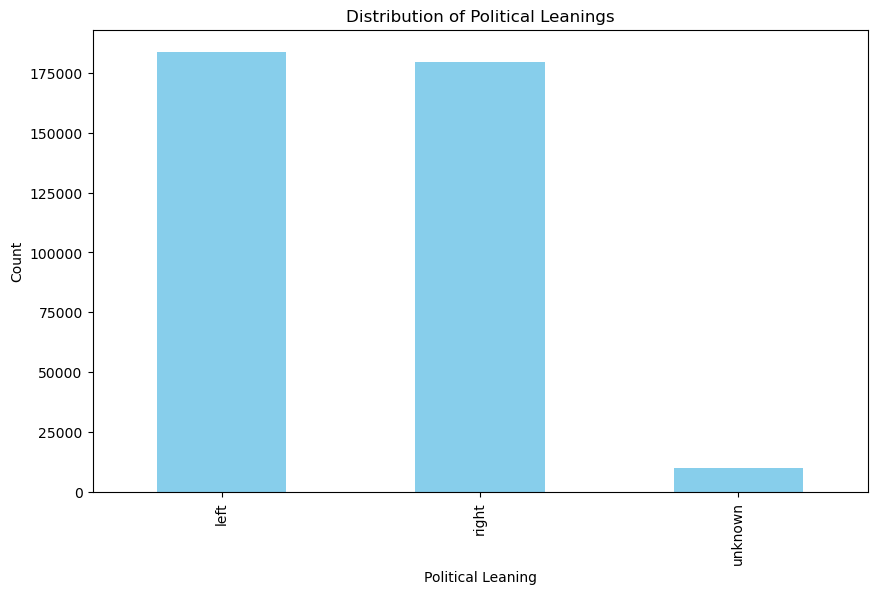

In [59]:
plt.figure(figsize=(10, 6))
df_pl_master['political_leaning'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Political Leanings')
plt.xlabel('Political Leaning')
plt.ylabel('Count')
plt.show()

# 2. Toxicity Label Distribution

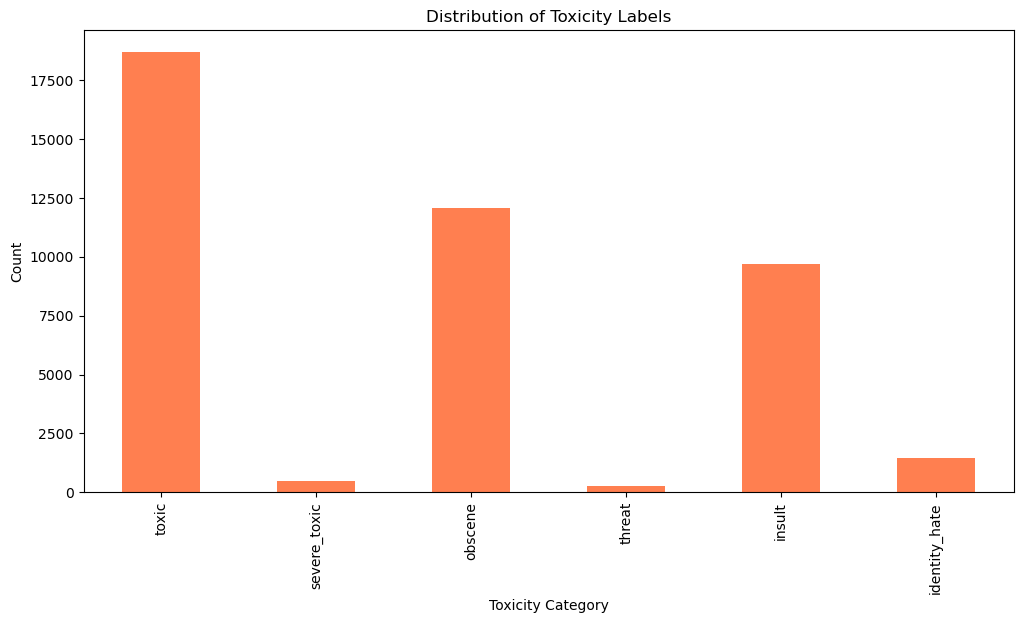

In [68]:
plt.figure(figsize=(12, 6))
df_toxicity_cleaned[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum().plot(kind='bar', color='coral')
plt.title('Distribution of Toxicity Labels')
plt.xlabel('Toxicity Category')
plt.ylabel('Count')
plt.show()

# 3. Distribution of sentiment_score in Reddit dataset

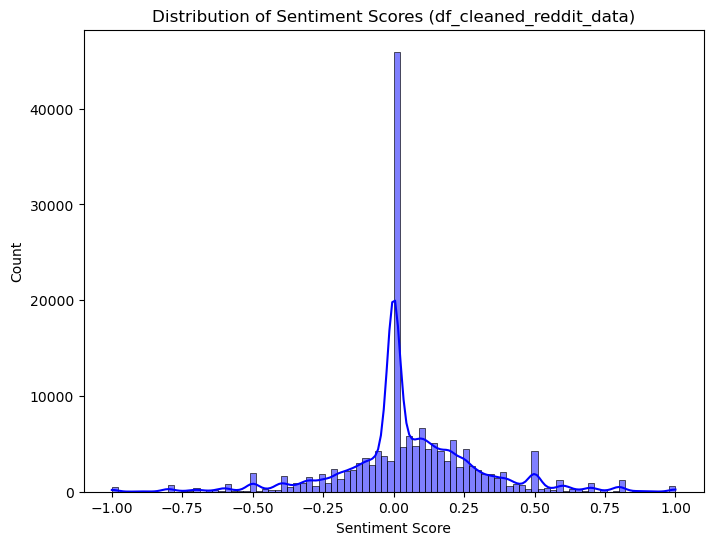

In [91]:
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned_reddit_data['sentiment_score'], bins=90, kde=True, color='blue')
plt.title('Distribution of Sentiment Scores (df_cleaned_reddit_data)')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()


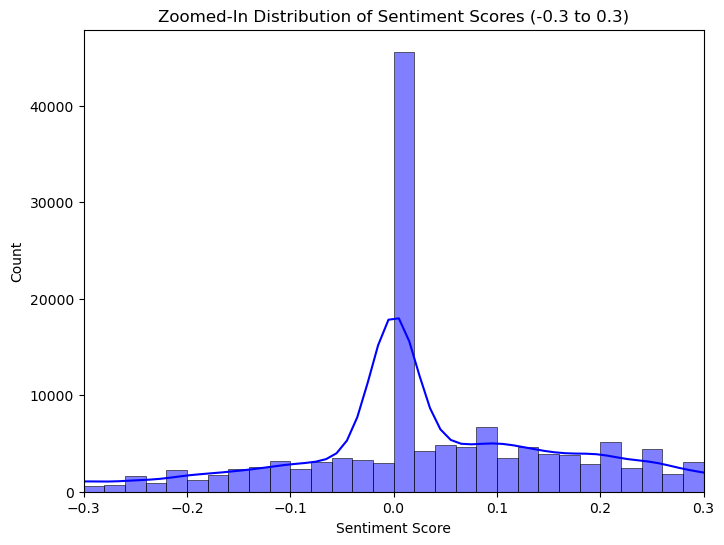

In [98]:
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned_reddit_data['sentiment_score'], bins=100, kde=True, color='blue')
plt.title('Zoomed-In Distribution of Sentiment Scores (-0.3 to 0.3)')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.xlim(-0.3, 0.3) 
plt.show()

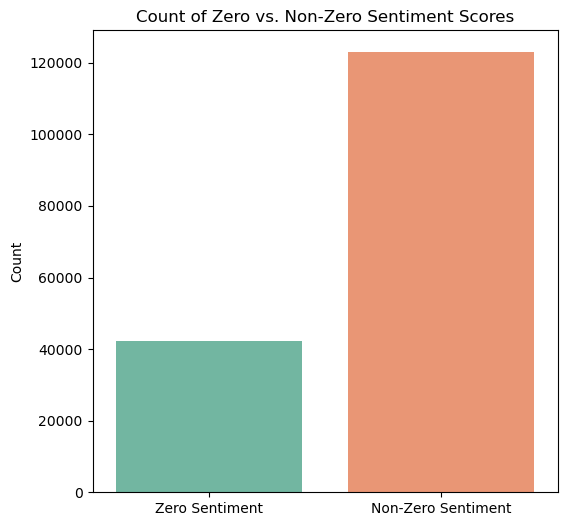

In [143]:
# Compare zero vs. non-zero
df_zero = df_cleaned_reddit_data[df_cleaned_reddit_data['sentiment_score'] == 0]
df_nonzero = df_cleaned_reddit_data[df_cleaned_reddit_data['sentiment_score'] != 0]

counts = {
    'Zero Sentiment': len(df_zero),
    'Non-Zero Sentiment': len(df_nonzero)
}

plt.figure(figsize=(6, 6))
sns.barplot(x=list(counts.keys()), y=list(counts.values()), hue=counts.keys() , palette='Set2')
plt.title('Count of Zero vs. Non-Zero Sentiment Scores')
plt.ylabel('Count')
plt.show()

# 4. Distribution of Top 10 subreddits by frequency

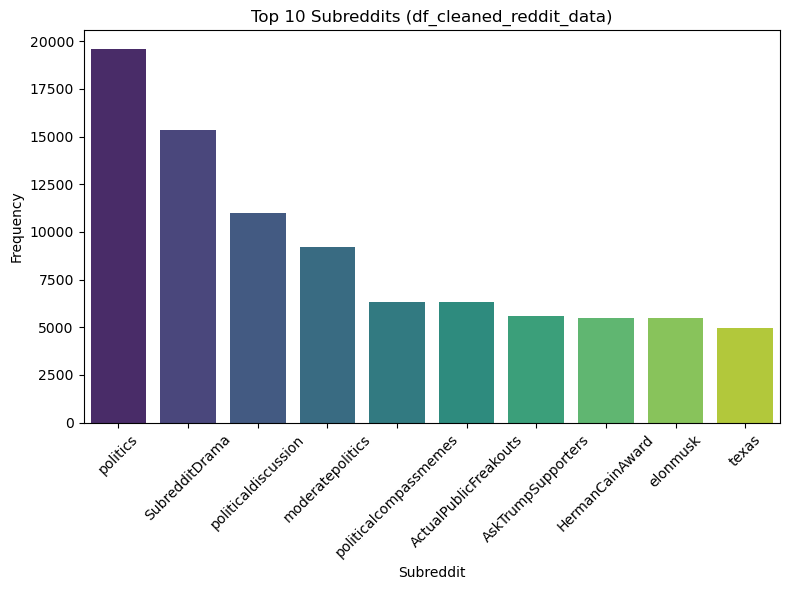

In [129]:
top_subreddits = df_cleaned_reddit_data['subreddit'].value_counts().nlargest(10)
plt.figure(figsize=(8, 6))
sns.barplot(x=top_subreddits.index, y=top_subreddits.values, hue=top_subreddits.index,  palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Subreddits (df_cleaned_reddit_data)')
plt.xlabel('Subreddit')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



# 5. Distribution of political_leaning

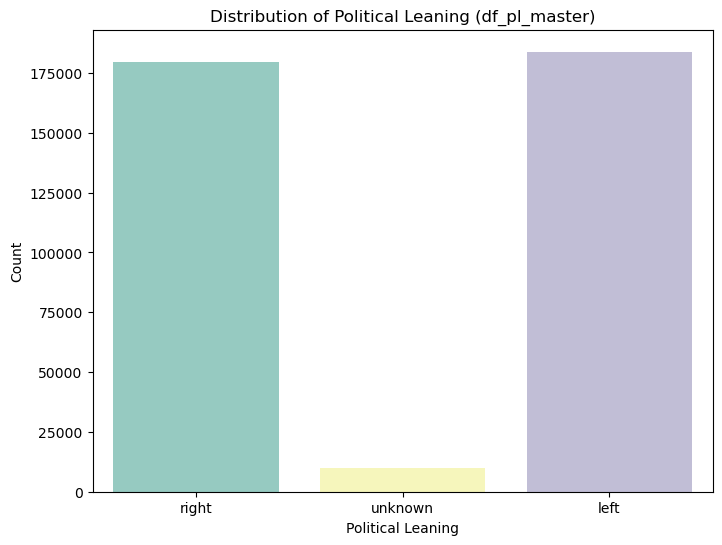

In [165]:

plt.figure(figsize=(8, 6))
sns.countplot(data=df_pl_master, x='political_leaning', hue='political_leaning' , palette='Set3')
plt.title('Distribution of Political Leaning (df_pl_master)')
plt.xlabel('Political Leaning')
plt.ylabel('Count')
plt.show()

# Saving New Cleaned Datasets

In [42]:
# Save cleaned datasets for future use

df_cleaned_reddit_data.to_csv('new_cleaned_reddit_data_Feb03.csv', index=False)
print("new_cleaned_reddit_data_Feb03.csv saved")
df_pl_master.to_csv('new_pl_master_Feb03.csv', index=False)
print("new_pl_master_Feb03.csv saved")
df_toxicity_cleaned.to_csv('new_toxicity_cleaned_Feb03.csv', index=False)
print("new_toxicity_cleaned_Feb03.csv saved")

new_cleaned_reddit_data.csv saved
new_pl_master.csv saved
new_toxicity_cleaned.csv saved
